In [13]:
import os
import torch
import pickle as pkl
import torchvision
import matplotlib.pyplot as plt
!pip install torchviz

Defaulting to user installation because normal site-packages is not writeable


In [14]:
modelname = 'model1'
names = pkl.load(open(f'./{modelname}/names.pkl', 'rb'))
arct = torch.load(f'./{modelname}/model.pt', map_location=torch.device('cpu'))


In [15]:
# Choose from the given names only
names

['Serena_Williams',
 'Ariel_Sharon',
 'Gloria_Macapagal_Arroyo',
 'Colin_Powell',
 'Amelie_Mauresmo',
 'George_W_Bush',
 'Junichiro_Koizumi',
 'Tony_Blair',
 'Vicente_Fox',
 'Tom_Daschle',
 'Kofi_Annan',
 'Lleyton_Hewitt',
 'Atal_Bihari_Vajpayee',
 'Igor_Ivanov',
 'Megawati_Sukarnoputri',
 'Hamid_Karzai',
 'Hans_Blix',
 'Gerhard_Schroeder',
 'Alejandro_Toledo',
 'Bill_Clinton',
 'Donald_Rumsfeld',
 'Tiger_Woods',
 'Laura_Bush']

In [16]:
# Parameters for model 1 and model 2

image_shape = (64, 64)
num_channels = 1
min_images = 20
max_images = 200
dataset = './Dataset/lfw_funneled/'

transforms = torchvision.transforms.Compose([
    torchvision.io.read_image,
    torchvision.transforms.functional.rgb_to_grayscale,
    torchvision.transforms.Resize(size = image_shape),
])

# Parameters for resnet152

# image_shape = (256, 256)
# num_channels = 3
# min_images = 20
# max_images = 200
# dataset = './Dataset/lfw_funneled/'

# transforms = torchvision.transforms.Compose([
#     torchvision.io.read_image,
#     torchvision.transforms.Resize(size = image_shape),
# ])

In [17]:
predict_images = [
    './Dataset/lfw_funneled/Atal_Bihari_Vajpayee/Atal_Bihari_Vajpayee_0019.jpg',
    './Dataset/lfw_funneled/Atal_Bihari_Vajpayee/Atal_Bihari_Vajpayee_0005.jpg',
]

X = torch.stack([transforms(img) for img in predict_images])
true_names = [name for name in map(lambda path: path.split('/')[-2], predict_images)]

In [18]:
with torch.no_grad():
    arct.eval()
    y_pred = arct(X.float())
    y_pred = torch.argmax(y_pred, dim=1)
    pred_names = [names[i] for i in y_pred]

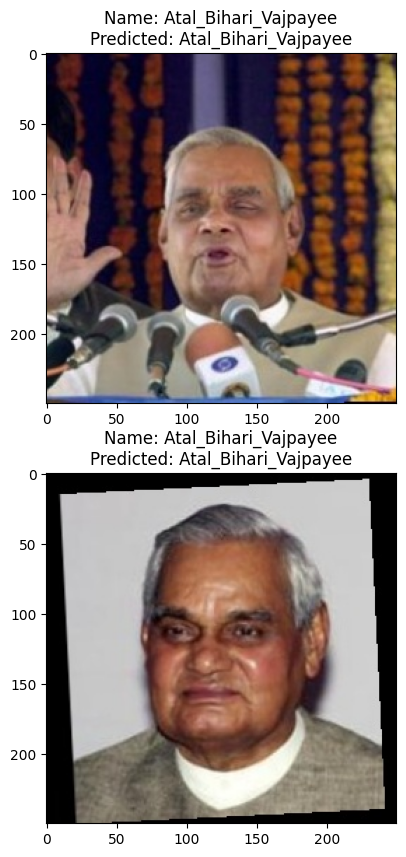

In [19]:
figure, axis = plt.subplots(len(predict_images),1)
figure.set_figwidth(10)
figure.set_figheight(10)

for i, path in enumerate(predict_images):
    axis[i].imshow(torchvision.io.read_image(path).permute(1,2,0))
    axis[i].set_title(f'Name: {true_names[i]}\nPredicted: {pred_names[i]}')